In [ ]:
from google.colab import files
uploaded = files.upload()

Saving quejas_telecomunicaciones_2022_2025.csv to quejas_telecomunicaciones_2022_2025.csv


In [ ]:
# Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from scipy.spatial.distance import pdist, squareform
from scipy.stats import pearsonr, spearmanr, chi2_contingency

In [ ]:
# Carga de datos

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

df = pd.read_csv('quejas_telecomunicaciones_2022_2025.csv', parse_dates=['fecha_ingreso', 'fecha_cierre'])
df2 = pd.read_csv('quejas_telecomunicaciones_2022_2025.csv')

print(f"Dimensiones del dataset: {df.shape}")
df.head()

/tmp/ipython-input-1423942003.py:6: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('quejas_telecomunicaciones_2022_2025.csv', parse_dates=['fecha_ingreso', 'fecha_cierre'])


Dimensiones del dataset: (32961, 23)


/tmp/ipython-input-1423942003.py:7: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('quejas_telecomunicaciones_2022_2025.csv')


,expediente,fecha_ingreso,fecha_cierre,tipo_conciliacion,estado_procesal,proveedor,nombre_comercial,giro,sector,odeco,...,costo_bien_servicio,monto_reclamado,monto_recuperado,procedimiento,medio_ingreso,clase,tipo_producto,modalidad_compra,modalidad_pago,problema_especial
0,PFC.AGS.B.3/000001-2022,2022-01-03,2022-01-20,Turnada a Concil Person P/seg,Conciliada,Cablevisión Red S.A. de C.V.,Izzi,Empresa de Tv de Paga (de Tv Restringida),Telecomunicaciones,Zona José Guadalupe Posada,...,1079,0,0,Conciliación Personal,Personal,Servicio,Servicio Normal,En establecimiento físico,Contado,No Problema Especial
1,PFC.AGS.B.3/000003-2022,2022-01-03,2022-02-03,Turnada a Concil Person P/seg,Conciliada,Teléfonos de México S.a.b. de C.v.,Telmex,Empresa de Telefonía Local,Telecomunicaciones,Zona José Guadalupe Posada,...,249,0,0,Conciliación Personal,Personal,Servicio,Servicio Normal,Por internet,Contado,No Problema Especial
2,PFC.AGS.B.3/000006-2022,2022-01-03,2022-02-09,Turnada a Concil Person P/seg,Conciliada,Corporación Novavisión S. de R.L. de C.V.,Sky,Empresa de Tv de Paga (de Tv Restringida),Telecomunicaciones,Zona José Guadalupe Posada,...,600,0,0,Conciliación Personal,Personal,Servicio,Servicio Normal,En establecimiento físico,Contado,No Problema Especial
3,PFC.AGS.B.3/000018-2022,2022-01-05,2022-03-17,Turnada a Concil Person P/seg,Conciliada,Corporación Novavisión S. de R.L. de C.V.,Sky,Proveedor de Acceso a Internet y Hospedaje de ...,Telecomunicaciones,Zona José Guadalupe Posada,...,899,899,1798,Conciliación Personal,Personal,Servicio,Servicio Normal,En establecimiento físico,Contado,No Problema Especial
4,PFC.AGS.B.3/000021-2022,2022-01-05,2022-04-20,Turnada a Concil Person P/seg,Conciliada,At&t Comunicaciones Digitales S. de R.L. de C.V.,At&t,Empresa de Telefonía Celular,Telecomunicaciones,Zona José Guadalupe Posada,...,62554,0,0,Conciliación Personal,Escrito,Servicio,Servicio Normal,En establecimiento físico,Apartado,No Problema Especial


In [ ]:
df.info()
print("\nColumnas:", df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32961 entries, 0 to 32960
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   expediente           32961 non-null  object        
 1   fecha_ingreso        32961 non-null  datetime64[ns]
 2   fecha_cierre         32887 non-null  datetime64[ns]
 3   tipo_conciliacion    32961 non-null  object        
 4   estado_procesal      32961 non-null  object        
 5   proveedor            32961 non-null  object        
 6   nombre_comercial     32961 non-null  object        
 7   giro                 32961 non-null  object        
 8   sector               32961 non-null  object        
 9   odeco                32961 non-null  object        
 10  estado               32961 non-null  object        
 11  tipo_reclamacion     32961 non-null  object        
 12  motivo_reclamacion   32961 non-null  object        
 13  costo_bien_servicio  32960 non-

In [ ]:
# Tratar columnas monetarias
cols_num = ['monto_recuperado', 'monto_reclamado', 'costo_bien_servicio']

for col in cols_num:
    df[col] = df[col].astype(str).replace('-', '0')
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(0)

In [ ]:
df.dtypes

,0
expediente,object
fecha_ingreso,datetime64[ns]
fecha_cierre,datetime64[ns]
tipo_conciliacion,object
estado_procesal,object
proveedor,object
nombre_comercial,object
giro,object
sector,object
odeco,object


In [ ]:
# Conteo de nulos
print(df.isnull().sum().sort_values(ascending=False))

modalidad_pago         1375
fecha_cierre             74
tipo_producto            10
problema_especial        10
modalidad_compra          9
clase                     4
medio_ingreso             1
nombre_comercial          0
proveedor                 0
estado_procesal           0
tipo_conciliacion         0
fecha_ingreso             0
expediente                0
giro                      0
sector                    0
monto_reclamado           0
costo_bien_servicio       0
motivo_reclamacion        0
tipo_reclamacion          0
estado                    0
odeco                     0
monto_recuperado          0
procedimiento             0
dtype: int64


In [ ]:
# Análisis de valores únicos
cols_categoricas = ['estado_procesal', 'proveedor', 'giro', 'medio_ingreso', 'modalidad_compra', 'nombre_comercial', 'tipo_reclamacion', 'clase', 'motivo_reclamacion']

for col in cols_categoricas:
    unicos = df[col].nunique()
    print(f"\n--- {col} ({unicos} únicos) ---")
    if unicos < 20:
        print(df[col].value_counts(normalize=True) * 100)
    else:
        print(df[col].value_counts().head(25))


--- estado_procesal (6 únicos) ---
estado_procesal
Conciliada                       58.111101
Desistimiento                    30.957799
No Conciliada                     9.298868
Improcedente                      1.480538
Cancelada                         0.148661
Turnada a Concil Person P/seg     0.003034
Name: proportion, dtype: float64

--- proveedor (522 únicos) ---
proveedor
Radiomóvil Dipsa S.A. de C.V.                                     9638
Pegaso Pcs S.A. de C.V.                                           3590
At&t Comunicaciones Digitales S. de R.L. de C.V.                  2524
Telefonía por Cable S.A. de C.V.                                  1879
Total Play Telecomunicaciones S.A. de C.V.                        1848
Servicio y Equipo en Telefonía Internet y Tv S.A. de C.V.         1627
Teléfonos de México S.a.b. de C.v.                                1425
Corporación Novavisión S. de R.L. de C.V.                         1328
Total Play Telecomunicaciones S.A.P.I. de C.V. 

## Exploración inicial del dataset previa al tratamiento

/tmp/ipython-input-3848806741.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_proveedores.values, y=top_proveedores.index, palette='viridis')


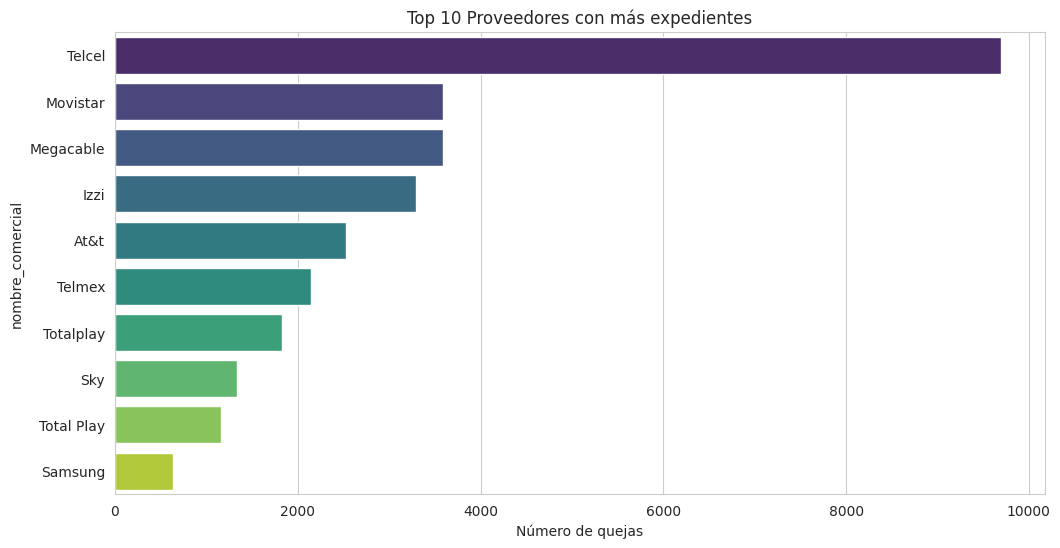

In [ ]:
top_proveedores = df['nombre_comercial'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_proveedores.values, y=top_proveedores.index, palette='viridis')
plt.title('Top 10 Proveedores con más expedientes')
plt.xlabel('Número de quejas')
plt.show()

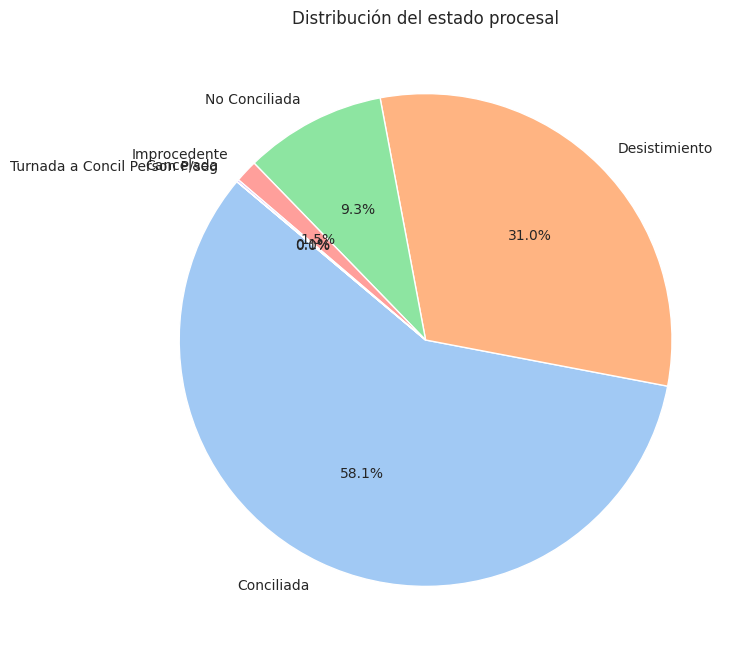

In [ ]:
estado_counts = df['estado_procesal'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(estado_counts, labels=estado_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribución del estado procesal')
plt.show()

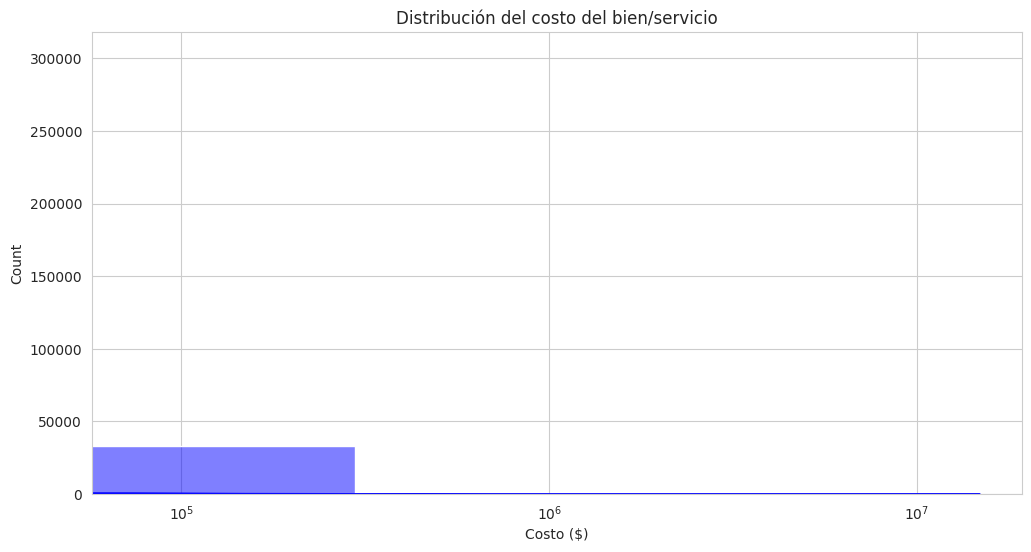

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['costo_bien_servicio'].dropna(), bins=50, kde=True, color='blue')
plt.title('Distribución del costo del bien/servicio')
plt.xlabel('Costo ($)')
plt.xscale('log')
plt.show()

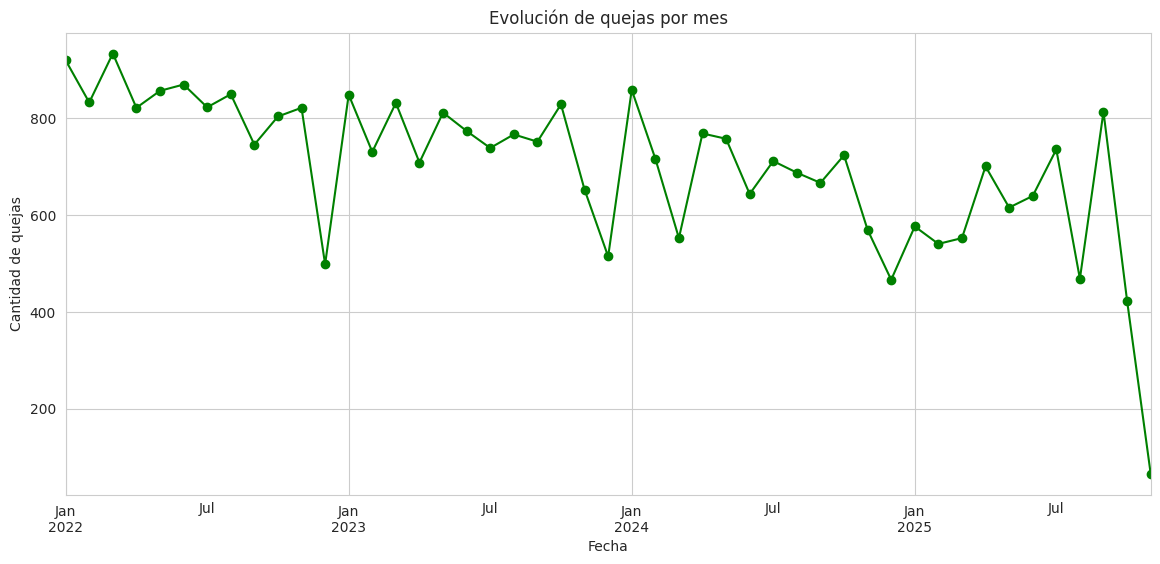

In [ ]:
df['mes_año'] = df['fecha_ingreso'].dt.to_period('M')

quejas_tiempo = df.groupby('mes_año').size()

plt.figure(figsize=(14, 6))
quejas_tiempo.plot(kind='line', marker='o', color='green')
plt.title('Evolución de quejas por mes')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de quejas')
plt.grid(True)
plt.show()

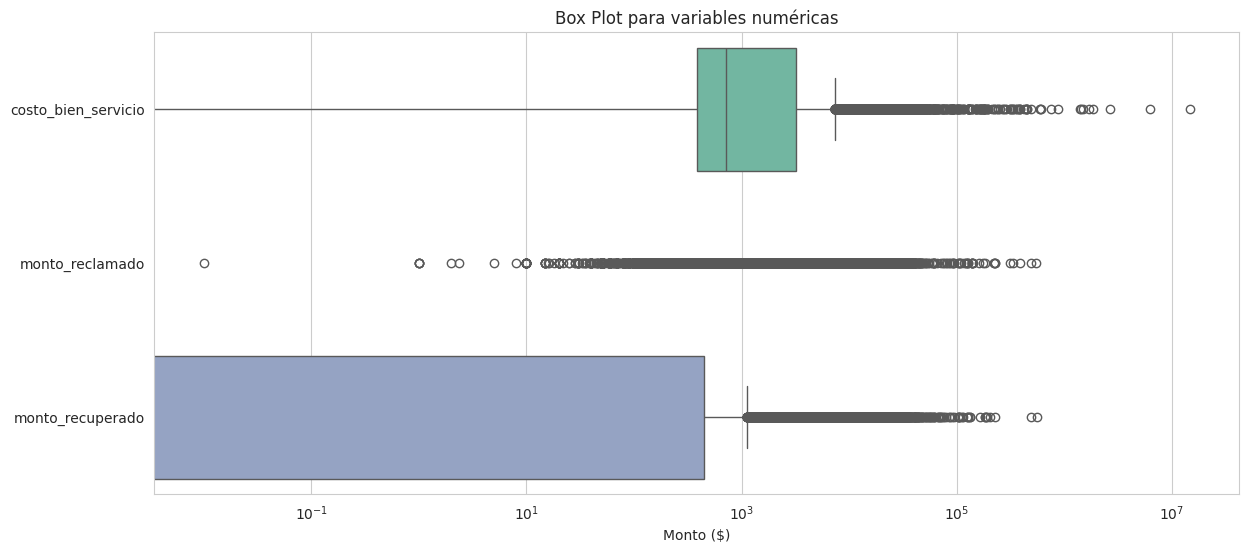

In [ ]:
cols_num_analisis = ['costo_bien_servicio', 'monto_reclamado', 'monto_recuperado']

plt.figure(figsize=(14, 6))
sns.boxplot(data=df[cols_num_analisis], orient='h', palette="Set2")
plt.title('Box Plot para variables numéricas')
plt.xlabel('Monto ($)')
plt.xscale('log')
plt.show()

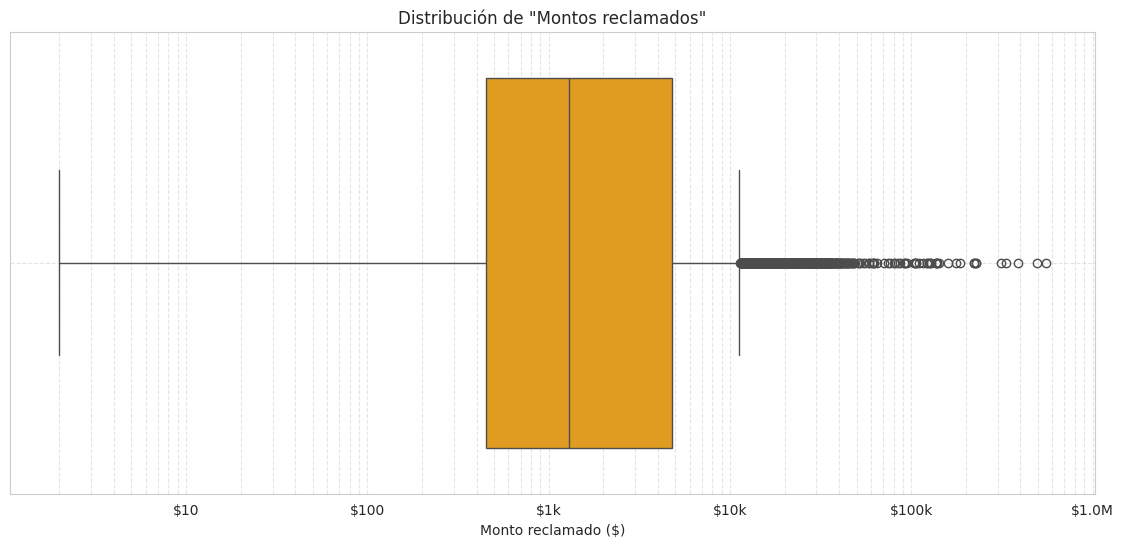

In [ ]:
df_con_dinero = df[df['monto_reclamado'] > 1].copy()

plt.figure(figsize=(14, 6))
g = sns.boxplot(data=df_con_dinero, x='monto_reclamado', color='orange')
g.set_xscale('log')

def formato_dinero(x, pos):
    if x >= 1000000:
        return f'${x/1000000:.1f}M'
    elif x >= 1000:
        return f'${x/1000:.0f}k'
    else:
        return f'${x:.0f}'

g.xaxis.set_major_formatter(ticker.FuncFormatter(formato_dinero))

plt.title('Distribución de "Montos reclamados"')
plt.xlabel('Monto reclamado ($)')
plt.grid(True, which="both", ls="--", alpha=0.5)

plt.show()

## Tratamiento

In [ ]:
# Normalizar las variables categóricas
cols_texto = ['giro', 'nombre_comercial', 'estado_procesal', 'motivo_reclamacion']
for col in cols_texto:
    df[col] = df[col].astype(str).str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [ ]:
# Hay 22 tipos de reclamación, serán englobados en las siguientes categorías:

clasificacion_problemas = {
    #Facturación y Pagos
    "Cobro Indebido": "Facturación y Pagos",
    "Negativa de Entrega de Información al Consumidor Sobre el Pago": "Facturación y Pagos",
    "Información Incompleta al Consumidor Sobre el Pago": "Facturación y Pagos",
    "Información Incorrecta al Consumidor Sobre el Pago": "Facturación y Pagos",
    "Información No Clara o Ilegible al Consumidor Sobre el Pago": "Facturación y Pagos",

    # Entrega, Cambios y Garantías
    "Entrega del Producto o Servicio": "Entrega, Cambios y Garantías",
    "Cambios, Devoluciones o Bonificaciones": "Entrega, Cambios y Garantías",
    "Garantías": "Entrega, Cambios y Garantías",
    "Pérdidas o Deterioro": "Entrega, Cambios y Garantías",

    # Contratos y Condiciones
    "Contratos": "Contratos y Condiciones",
    "Portabilidad": "Contratos y Condiciones",
    "Desbloqueo": "Contratos y Condiciones",

    # Información al Consumidor
    "Información Incorrecta al Consumidor Sobre el Producto o Servicio": "Información al Consumidor",
    "Ausencia de Información al Consumidor Sobre el Producto o Servicio": "Información al Consumidor",
    "Información No Clara al Consumidor Sobre el Producto o Servicio": "Información al Consumidor",
    "Información Incompleta al Consumidor Sobre el Producto o Servicio": "Información al Consumidor",
    "Información en Otros Idiomas al Consumidor Sobre el Producto o Servicio": "Información al Consumidor",
    "Negativa de Entrega de Información al Consumidor Sobre el Proveedor" :  "Información al Consumidor",

    # Atención y Trato
    "Trato o Servicio al Cliente": "Atención al Cliente",

    # Publicidad y Promociones
    "Publicidad, Ofertas y Promociones": "Publicidad y Promociones",

    # Privacidad y Datos
    "Privacidad": "Privacidad",

    # Otros
    "-": "Otros"
}

df["problema_clasificado"] = df["tipo_reclamacion"].map(clasificacion_problemas)
df["problema_clasificado"] = df["problema_clasificado"].fillna("Otros")

df['problema_clasificado'].value_counts()

,count
problema_clasificado,
Facturación y Pagos,14400
"Entrega, Cambios y Garantías",12394
Contratos y Condiciones,5399
Publicidad y Promociones,334
Atención al Cliente,263
Información al Consumidor,142
Privacidad,19
Otros,10


In [ ]:
# Hay 27 tipos de "giros", serán englobados en las siguientes categorías:
mapa_giro = {
    # Internet
    "PROVEEDOR DE ACCESO A INTERNET Y HOSPEDAJE DE PAGINAS WEB": "Internet",
    "PRESTACION DE SERVICIOS DE INTERNET": "Internet",

    # Telefonía móvil
    "EMPRESA DE TELEFONIA CELULAR": "Telefonía Móvil",
    "DISTRIBUIDOR DE SERVICIO DE TELEFONIA CELULAR": "Telefonía Móvil",
    "EMPRESAS DE PAGING, TRUNKING O CUALQUIER OTRO FORMA DE LOCALIZACION": "Telefonía Móvil",

    # Telefonía fija
    "EMPRESA DE TELEFONIA LOCAL": "Telefonía Fija",
    "EMPRESA DE LARGA DISTANCIA": "Telefonía Fija",
    "TELEFONIA FIJA": "Telefonía Fija",
    "CASETAS TELEFONICAS (INCLUYE MENSAJERIA TELEFONICA)": "Telefonía Fija",
    "EMPRESA DE TELEFONIA": "Telefonía Fija",

    # TV
    "EMPRESA DE TV DE PAGA (DE TV RESTRINGIDA)": "TV",
    "EMPRESA DE TV DE PAGA": "TV",
    "TELEVISION POR CABLE": "TV",
    "TV SATELITAL": "TV",
    "TV VIA SATELITE": "TV",
    "TELELEVISION SATELITAL": "TV",
    "TELEVISION SATELITAL": "TV",
    "EMPRESA DE TRANSMISION DE PROGRAMAS DE RADIO Y TELEVISION": "TV",

    # Otros
    "TELECOMUNICACIONES": "Otros",
    "EMPRESA DE CANALIZACION Y CABLEADO": "Otros",
    "DESPACHO DE COBRANZA": "Otros",
    "FABRICACION DE ELECTRODOMESTICOS Y LINEA BLANCA": "Otros",
    "TIENDA DE COMPUTADORAS Y SUS ACCESORIOS": "Otros",
    "TALLER DE REPARACION DE EQUIPO DE COMPUTO Y BIENES RELACIONADOS": "Otros",
    "TALLER DE REPARACION Y MANTENIMIENTO DE EQUIPO ELECTRONICO": "Otros",
    "TIENDA ESPECIALIZADA EN PRODUCTOS ELECTRONICOS": "Otros",
    "-": "Otros"
}

df["tipo_servicio"] = df["giro"].map(mapa_giro)
df["tipo_servicio"] = df["tipo_servicio"].fillna("Otros")

df["tipo_servicio"].value_counts()


,count
tipo_servicio,
Telefonía Móvil,18649
TV,11072
Telefonía Fija,2305
Internet,902
Otros,33


In [ ]:
# Se identificó que hay 2 categorías para TotalPlay

df.loc[df['nombre_comercial'] == 'TOTAL PLAY', 'nombre_comercial'] = 'TOTALPLAY'

In [ ]:
# Top proveedores

top = df['nombre_comercial'].value_counts().nlargest(7).index.tolist()

df['proveedor_top'] = df['nombre_comercial'].apply(lambda x: x if x in top else 'OTROS')

print("Top Proveedores Agrupados")
print(df['proveedor_top'].value_counts())
df.head()

Top Proveedores Agrupados
proveedor_top
TELCEL       9691
OTROS        5133
MOVISTAR     3592
MEGACABLE    3591
IZZI         3294
TOTALPLAY    2988
AT&T         2528
TELMEX       2144
Name: count, dtype: int64


,expediente,fecha_ingreso,fecha_cierre,tipo_conciliacion,estado_procesal,proveedor,nombre_comercial,giro,sector,odeco,...,medio_ingreso,clase,tipo_producto,modalidad_compra,modalidad_pago,problema_especial,mes_año,problema_clasificado,tipo_servicio,proveedor_top
0,PFC.AGS.B.3/000001-2022,2022-01-03,2022-01-20,Turnada a Concil Person P/seg,CONCILIADA,Cablevisión Red S.A. de C.V.,IZZI,EMPRESA DE TV DE PAGA (DE TV RESTRINGIDA),Telecomunicaciones,Zona José Guadalupe Posada,...,Personal,Servicio,Servicio Normal,En establecimiento físico,Contado,No Problema Especial,2022-01,Facturación y Pagos,TV,IZZI
1,PFC.AGS.B.3/000003-2022,2022-01-03,2022-02-03,Turnada a Concil Person P/seg,CONCILIADA,Teléfonos de México S.a.b. de C.v.,TELMEX,EMPRESA DE TELEFONIA LOCAL,Telecomunicaciones,Zona José Guadalupe Posada,...,Personal,Servicio,Servicio Normal,Por internet,Contado,No Problema Especial,2022-01,"Entrega, Cambios y Garantías",Telefonía Fija,TELMEX
2,PFC.AGS.B.3/000006-2022,2022-01-03,2022-02-09,Turnada a Concil Person P/seg,CONCILIADA,Corporación Novavisión S. de R.L. de C.V.,SKY,EMPRESA DE TV DE PAGA (DE TV RESTRINGIDA),Telecomunicaciones,Zona José Guadalupe Posada,...,Personal,Servicio,Servicio Normal,En establecimiento físico,Contado,No Problema Especial,2022-01,Contratos y Condiciones,TV,OTROS
3,PFC.AGS.B.3/000018-2022,2022-01-05,2022-03-17,Turnada a Concil Person P/seg,CONCILIADA,Corporación Novavisión S. de R.L. de C.V.,SKY,PROVEEDOR DE ACCESO A INTERNET Y HOSPEDAJE DE ...,Telecomunicaciones,Zona José Guadalupe Posada,...,Personal,Servicio,Servicio Normal,En establecimiento físico,Contado,No Problema Especial,2022-01,"Entrega, Cambios y Garantías",Internet,OTROS
4,PFC.AGS.B.3/000021-2022,2022-01-05,2022-04-20,Turnada a Concil Person P/seg,CONCILIADA,At&t Comunicaciones Digitales S. de R.L. de C.V.,AT&T,EMPRESA DE TELEFONIA CELULAR,Telecomunicaciones,Zona José Guadalupe Posada,...,Escrito,Servicio,Servicio Normal,En establecimiento físico,Apartado,No Problema Especial,2022-01,"Entrega, Cambios y Garantías",Telefonía Móvil,AT&T


In [ ]:
# Tiempos de resolución
df['fecha_ingreso'] = pd.to_datetime(df['fecha_ingreso'], errors='coerce')
df['fecha_cierre'] = pd.to_datetime(df['fecha_cierre'], errors='coerce')

df['dias_resolucion'] = (df['fecha_cierre'] - df['fecha_ingreso']).dt.days

df['dias_resolucion'] = df['dias_resolucion'].apply(lambda x: x if x >= 0 else np.nan)

print("Estadísticas de días de resolución")
print(df['dias_resolucion'].describe())
df.head()

Estadísticas de días de resolución
count    32884.000000
mean        72.999483
std         96.812434
min          0.000000
25%         19.000000
50%         39.000000
75%         89.000000
max       1014.000000
Name: dias_resolucion, dtype: float64


,expediente,fecha_ingreso,fecha_cierre,tipo_conciliacion,estado_procesal,proveedor,nombre_comercial,giro,sector,odeco,...,clase,tipo_producto,modalidad_compra,modalidad_pago,problema_especial,mes_año,problema_clasificado,tipo_servicio,proveedor_top,dias_resolucion
0,PFC.AGS.B.3/000001-2022,2022-01-03,2022-01-20,Turnada a Concil Person P/seg,CONCILIADA,Cablevisión Red S.A. de C.V.,IZZI,EMPRESA DE TV DE PAGA (DE TV RESTRINGIDA),Telecomunicaciones,Zona José Guadalupe Posada,...,Servicio,Servicio Normal,En establecimiento físico,Contado,No Problema Especial,2022-01,Facturación y Pagos,TV,IZZI,17.0
1,PFC.AGS.B.3/000003-2022,2022-01-03,2022-02-03,Turnada a Concil Person P/seg,CONCILIADA,Teléfonos de México S.a.b. de C.v.,TELMEX,EMPRESA DE TELEFONIA LOCAL,Telecomunicaciones,Zona José Guadalupe Posada,...,Servicio,Servicio Normal,Por internet,Contado,No Problema Especial,2022-01,"Entrega, Cambios y Garantías",Telefonía Fija,TELMEX,31.0
2,PFC.AGS.B.3/000006-2022,2022-01-03,2022-02-09,Turnada a Concil Person P/seg,CONCILIADA,Corporación Novavisión S. de R.L. de C.V.,SKY,EMPRESA DE TV DE PAGA (DE TV RESTRINGIDA),Telecomunicaciones,Zona José Guadalupe Posada,...,Servicio,Servicio Normal,En establecimiento físico,Contado,No Problema Especial,2022-01,Contratos y Condiciones,TV,OTROS,37.0
3,PFC.AGS.B.3/000018-2022,2022-01-05,2022-03-17,Turnada a Concil Person P/seg,CONCILIADA,Corporación Novavisión S. de R.L. de C.V.,SKY,PROVEEDOR DE ACCESO A INTERNET Y HOSPEDAJE DE ...,Telecomunicaciones,Zona José Guadalupe Posada,...,Servicio,Servicio Normal,En establecimiento físico,Contado,No Problema Especial,2022-01,"Entrega, Cambios y Garantías",Internet,OTROS,71.0
4,PFC.AGS.B.3/000021-2022,2022-01-05,2022-04-20,Turnada a Concil Person P/seg,CONCILIADA,At&t Comunicaciones Digitales S. de R.L. de C.V.,AT&T,EMPRESA DE TELEFONIA CELULAR,Telecomunicaciones,Zona José Guadalupe Posada,...,Servicio,Servicio Normal,En establecimiento físico,Apartado,No Problema Especial,2022-01,"Entrega, Cambios y Garantías",Telefonía Móvil,AT&T,105.0


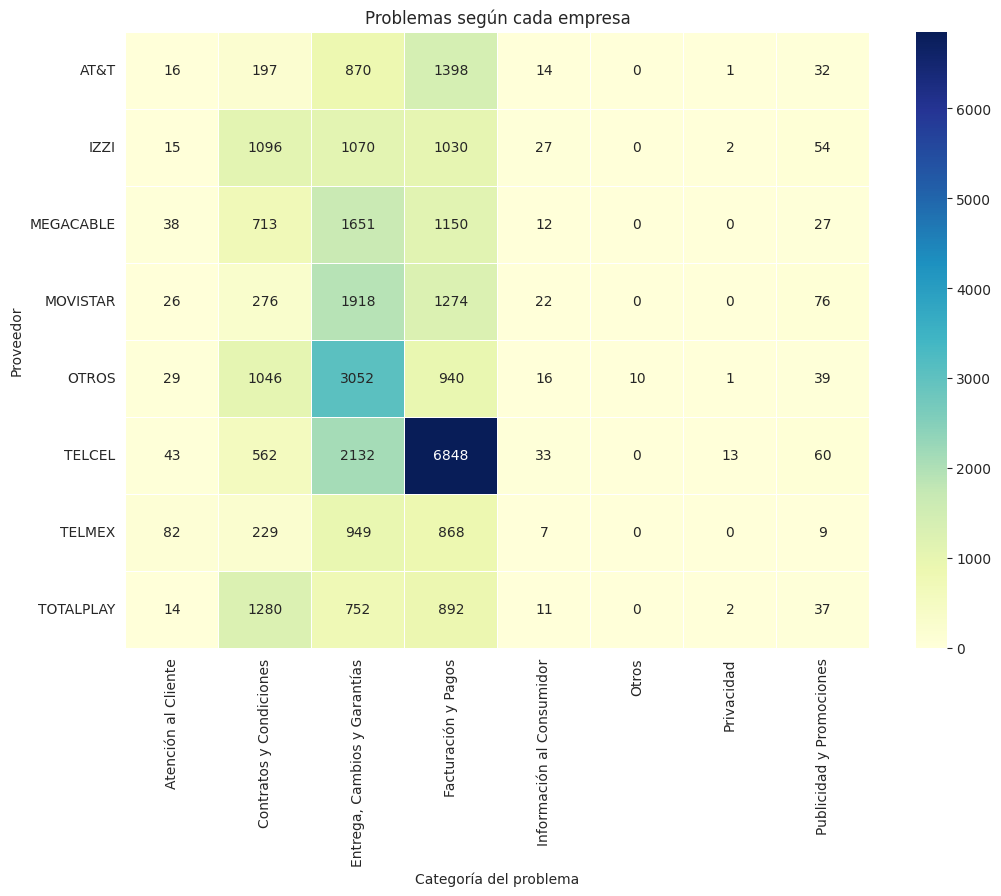

In [ ]:
# Análisis del número de probleamas por empresa
tabla_calor = pd.crosstab(df['proveedor_top'], df['problema_clasificado'])

plt.figure(figsize=(12, 8))
sns.heatmap(tabla_calor, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)

plt.title('Problemas según cada empresa')
plt.xlabel('Categoría del problema')
plt.ylabel('Proveedor')
plt.yticks(rotation=0)
plt.show()

In [ ]:
# Se observa que TELCEL es la compañía con más reclamos, sin embargo, esto es porque es la compañía con más usuarios.

In [ ]:
df.describe()

,fecha_ingreso,fecha_cierre,costo_bien_servicio,monto_reclamado,monto_recuperado,dias_resolucion
count,32961,32887,3.296100e+04,32961.000000,32961.000000,32884.000000
mean,2023-10-14 12:15:44.971329792,2023-12-26 16:44:37.970018304,5.187957e+03,1179.394589,1122.203856,72.999483
min,2022-01-03 00:00:00,2022-01-06 00:00:00,0.000000e+00,0.000000,0.000000,0.000000
25%,2022-10-24 00:00:00,2023-01-23 00:00:00,3.890000e+02,0.000000,0.000000,19.000000
50%,2023-09-20 00:00:00,2023-12-15 00:00:00,7.090000e+02,0.000000,0.000000,39.000000
75%,2024-09-13 00:00:00,2024-11-26 00:00:00,3.171000e+03,0.000000,450.000000,89.000000
max,2025-11-25 00:00:00,2025-11-30 00:00:00,1.479827e+07,551335.060000,556800.000000,1014.000000
std,NaN,NaN,9.333316e+04,7770.168033,6636.188936,96.812434


In [ ]:

# Queja resuelta
df["resuelta"] = df["estado_procesal"].str.strip().str.upper() == "CONCILIADA"


# Porcentaje recuperado
df['porcentaje_recuperado'] = np.where(
    df['monto_reclamado'] > 0,
    df['monto_recuperado'] / df['monto_reclamado'],
    np.nan
)
df["porcentaje_recuperado"] = df["porcentaje_recuperado"].fillna(0)

# Año y mes
df['anio'] = df['fecha_ingreso'].dt.year
df['mes'] = df['fecha_ingreso'].dt.month


df.describe()



,fecha_ingreso,fecha_cierre,costo_bien_servicio,monto_reclamado,monto_recuperado,dias_resolucion,porcentaje_recuperado,anio,mes
count,32961,32887,3.296100e+04,32961.000000,32961.000000,32884.000000,32961.000000,32961.000000,32961.000000
mean,2023-10-14 12:15:44.971329792,2023-12-26 16:44:37.970018304,5.187957e+03,1179.394589,1122.203856,72.999483,0.312514,2023.321653,6.093231
min,2022-01-03 00:00:00,2022-01-06 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2022.000000,1.000000
25%,2022-10-24 00:00:00,2023-01-23 00:00:00,3.890000e+02,0.000000,0.000000,19.000000,0.000000,2022.000000,3.000000
50%,2023-09-20 00:00:00,2023-12-15 00:00:00,7.090000e+02,0.000000,0.000000,39.000000,0.000000,2023.000000,6.000000
75%,2024-09-13 00:00:00,2024-11-26 00:00:00,3.171000e+03,0.000000,450.000000,89.000000,0.000000,2024.000000,9.000000
max,2025-11-25 00:00:00,2025-11-30 00:00:00,1.479827e+07,551335.060000,556800.000000,1014.000000,1556.592000,2025.000000,12.000000
std,NaN,NaN,9.333316e+04,7770.168033,6636.188936,96.812434,9.452079,1.087521,3.290480


In [ ]:
# OUTLIERS (Regla de 2 sigma)

cols_a_limpiar = ['monto_reclamado', 'monto_recuperado', 'dias_resolucion']

# Regla de 2 sigmas
for col in cols_a_limpiar:
    media = df[col].mean()
    sigma = df[col].std()

    limite_inferior = media - 2 * sigma
    limite_superior = media + 2 * sigma

    df = df[(df[col] >= limite_inferior) & (df[col] <= limite_superior)]

# DATASET FINAL PARA DASHBOARD

columnas_finales = [
    'fecha_ingreso', 'anio', 'mes', 'estado', 'proveedor_top',
    'nombre_comercial', 'tipo_servicio',
    'problema_clasificado', 'motivo_reclamacion',
    'estado_procesal', 'resuelta',
    'monto_reclamado', 'monto_recuperado', 'porcentaje_recuperado',
    'dias_resolucion',
]

df_final = df[columnas_finales].copy()
df_final.to_csv('df_telecom_final.csv', index=False)
print("CSV final guardado")

print("Dimensiones df_final:", df_final.shape)
df_final.head()

CSV final guardado
Dimensiones df_final: (30379, 15)


,fecha_ingreso,anio,mes,estado,proveedor_top,nombre_comercial,tipo_servicio,problema_clasificado,motivo_reclamacion,estado_procesal,resuelta,monto_reclamado,monto_recuperado,porcentaje_recuperado,dias_resolucion
0,2022-01-03,2022,1,Aguascalientes,IZZI,IZZI,TV,Facturación y Pagos,NO RESPETO ACUERDO PREVIO,CONCILIADA,True,0.0,0.0,0.0,17.0
1,2022-01-03,2022,1,Aguascalientes,TELMEX,TELMEX,Telefonía Fija,"Entrega, Cambios y Garantías",PRODUCTO O SERVICIO EQUIVOCADO,CONCILIADA,True,0.0,0.0,0.0,31.0
2,2022-01-03,2022,1,Aguascalientes,OTROS,SKY,TV,Contratos y Condiciones,NEGATIVA A LA RESCISION,CONCILIADA,True,0.0,0.0,0.0,37.0
3,2022-01-05,2022,1,Aguascalientes,OTROS,SKY,Internet,"Entrega, Cambios y Garantías",NEGATIVA A LA DEVOLUCION DE DEPOSITO,CONCILIADA,True,899.0,1798.0,2.0,71.0
4,2022-01-05,2022,1,Aguascalientes,AT&T,AT&T,Telefonía Móvil,"Entrega, Cambios y Garantías",INCUMPLIMIENTO DE PLAZOS,CONCILIADA,True,0.0,0.0,0.0,105.0


In [ ]:
# Conteo de nulos
print(df_final.isnull().sum().sort_values(ascending=False))

fecha_ingreso            0
anio                     0
mes                      0
estado                   0
proveedor_top            0
nombre_comercial         0
tipo_servicio            0
problema_clasificado     0
motivo_reclamacion       0
estado_procesal          0
resuelta                 0
monto_reclamado          0
monto_recuperado         0
porcentaje_recuperado    0
dias_resolucion          0
dtype: int64


In [ ]:
df_final.describe()

,fecha_ingreso,anio,mes,monto_reclamado,monto_recuperado,porcentaje_recuperado,dias_resolucion
count,30379,30379.000000,30379.000000,30379.000000,30379.000000,30379.000000,30379.000000
mean,2023-10-26 09:29:42.876329216,2023.351789,6.121169,521.704182,571.211162,0.233075,55.152408
min,2022-01-03 00:00:00,2022.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2022-10-28 00:00:00,2022.000000,3.000000,0.000000,0.000000,0.000000,18.000000
50%,2023-10-06 00:00:00,2023.000000,6.000000,0.000000,0.000000,0.000000,35.000000
75%,2024-10-04 00:00:00,2024.000000,9.000000,0.000000,400.000000,0.000000,75.000000
max,2025-11-25 00:00:00,2025.000000,12.000000,16523.000000,10917.000000,259.700000,263.000000
std,NaN,1.098264,3.287530,1710.249312,1441.183311,2.765423,54.141355


## CSV 2: Perfil de proveedores

Se construyó una matriz de perfiles por proveedor, donde cada proveedor es representado como un vector numérico que resume su comportamiento agregado en términos de volumen de quejas, eficiencia de conciliación, tiempos de resolución y montos económicos.
Esta representación permite aplicar formalmente medidas de similitud, análisis de correlación y métodos de proyección.


In [ ]:

perfil_proveedor = (
    df.groupby("proveedor_top")
    .agg(
        total_quejas=("proveedor_top", "count"),
        tasa_conciliacion=("resuelta", "mean"),
        mediana_dias_resolucion=("dias_resolucion", "median"),
        promedio_monto_reclamado=("monto_reclamado", "mean"),
        promedio_porcentaje_recuperado=("porcentaje_recuperado", "mean")
    )
    .dropna()
)
mapa_total_usuarios = {
  "TELCEL": 162420073,
  "OTROS": 99,
  "MOVISTAR": 31934419,
  "MEGACABLE": 12009829,
  "IZZI" : 15489758,
  "TOTALPLAY": 12241992,
  "AT&T": 42184165,
  "TELMEX": 19510076
}

perfil_proveedor["usuarios_totales"] = (perfil_proveedor.index.map(mapa_total_usuarios))
perfil_proveedor = perfil_proveedor.drop("OTROS")

# Crear el índice por cada 100k usuarios
perfil_proveedor['quejas_por_100k'] = (perfil_proveedor['total_quejas'] / perfil_proveedor['usuarios_totales']) * 100000

columnas_ordenadas = [
    'usuarios_totales',
    'quejas_por_100k',
    'tasa_conciliacion',
    'mediana_dias_resolucion',
    'promedio_monto_reclamado',
    'promedio_porcentaje_recuperado'
]

perfil_proveedor = perfil_proveedor[columnas_ordenadas]


perfil_proveedor.to_csv("perfil_proveedores_raw.csv")

perfil_proveedor



,usuarios_totales,quejas_por_100k,tasa_conciliacion,mediana_dias_resolucion,promedio_monto_reclamado,promedio_porcentaje_recuperado
proveedor_top,,,,,,
AT&T,42184165,5.556587,0.437713,31.0,471.344603,0.115801
IZZI,15489758,20.323106,0.637230,34.0,279.393882,0.232696
MEGACABLE,12009829,29.167776,0.714245,21.0,160.963251,0.302600
MOVISTAR,31934419,10.405701,0.533554,36.0,520.423334,0.169510
TELCEL,162420073,5.569509,0.547424,28.0,575.983318,0.273677
TELMEX,19510076,9.825692,0.691184,63.0,543.907423,0.211141
TOTALPLAY,12241992,23.256019,0.630839,28.0,174.105767,0.225315


In [ ]:
# Estándarización gaussiana (ya que los datos tienen distintas escalas,
# y las variables no están distribuidas uniformemente)



scaler_std = StandardScaler()
perfil_std = pd.DataFrame(
    scaler_std.fit_transform(perfil_proveedor),
    index=perfil_proveedor.index,
    columns=perfil_proveedor.columns
)

perfil_std.to_csv("perfil_proveedores_std.csv")


In [ ]:
perfil_std

,usuarios_totales,quejas_por_100k,tasa_conciliacion,mediana_dias_resolucion,promedio_monto_reclamado,promedio_porcentaje_recuperado
proveedor_top,,,,,,
AT&T,-0.001428,-1.077607,-1.782771,-0.274290,0.492967,-1.780608
IZZI,-0.533866,0.630574,0.424156,-0.034286,-0.662428,0.242638
MEGACABLE,-0.603276,1.653720,1.276046,-1.074303,-1.375289,1.452559
MOVISTAR,-0.205866,-0.516665,-0.722642,0.125716,0.788383,-0.851004
TELCEL,2.396761,-1.076113,-0.569218,-0.514294,1.122811,0.951951
TELMEX,-0.453678,-0.583760,1.020962,2.285752,0.929739,-0.130435
TOTALPLAY,-0.598645,0.969852,0.353468,-0.514294,-1.296181,0.114899


Se calcularon matrices de disimilitud entre proveedores utilizando normas de Minkowski. La distancia euclidiana (p=2) permite capturar diferencias globales en el perfil, mientras que la distancia Manhattan (p=1) es más robusta a variaciones individuales entre variables.

In [ ]:
# Distancia Euclidiana

#  Esto puede indicar qué tan cerca está una empresa de la otra, y qué tanto le hace competencia
# en materia de manejo de quejas

dist_euclid = squareform(
    pdist(perfil_std.values, metric="euclidean")
)

dist_euclid_df = pd.DataFrame(
    dist_euclid,
    index=perfil_std.index,
    columns=perfil_std.index
)

dist_euclid_df.to_csv("distancia_euclidiana_proveedores.csv")
dist_euclid_df

# Se observa que totalplay e izzi son muy similares


proveedor_top,AT&T,IZZI,MEGACABLE,MOVISTAR,TELCEL,TELMEX,TOTALPLAY
proveedor_top,,,,,,,
AT&T,0.000000,3.682114,5.635823,1.609895,3.891684,4.216277,3.995482
IZZI,3.682114,0.000000,2.197971,2.462802,4.050772,3.145468,0.879016
MEGACABLE,5.635823,2.197971,0.000000,4.504574,5.163519,4.919630,1.851499
MOVISTAR,1.609895,2.462802,4.504574,0.000000,3.298832,2.882884,3.034800
TELCEL,3.891684,4.050772,5.163519,3.298832,0.000000,4.466003,4.534529
TELMEX,4.216277,3.145468,4.919630,2.882884,4.466003,0.000000,3.966792
TOTALPLAY,3.995482,0.879016,1.851499,3.034800,4.534529,3.966792,0.000000


In [ ]:
# Distancia Manhattan
dist_manhattan = squareform(
    pdist(perfil_std.values, metric="cityblock")
)

dist_manhattan_df = pd.DataFrame(
    dist_manhattan,
    index=perfil_std.index,
    columns=perfil_std.index
)

dist_manhattan_df.to_csv("distancia_manhattan_proveedores.csv")
dist_manhattan_df

proveedor_top,AT&T,IZZI,MEGACABLE,MOVISTAR,TELCEL,TELMEX,TOTALPLAY
proveedor_top,,,,,,,
AT&T,0.000000,7.866192,12.293429,3.450536,7.215643,8.396818,8.705575
IZZI,7.866192,0.000000,4.907245,5.326494,8.605247,6.176608,1.716244
MEGACABLE,12.293429,4.907245,0.000000,10.233738,11.133851,9.890239,3.587854
MOVISTAR,3.450536,5.326494,10.233738,0.000000,6.092892,5.080472,6.645884
TELCEL,7.215643,8.605247,11.133851,6.092892,0.000000,9.008476,9.220100
TELMEX,8.396818,6.176608,9.890239,5.080472,9.008476,0.000000,7.637374
TOTALPLAY,8.705575,1.716244,3.587854,6.645884,9.220100,7.637374,0.000000


# PCA con los proveedores

El PCA se utilizó exclusivamente como método de proyección lineal para visualizar la estructura global de similitud entre proveedores, preservando la máxima varianza posible en dos dimensiones

Objetivos:
- Identificar ejes dominantes de variación
- Visualizar similitudes globales
- Reducir dimensionalidad para visualización

In [ ]:
pca = PCA(n_components=3)
pca_result2 = pca.fit_transform(perfil_std)

df_pca2 = pd.DataFrame(
    pca_result2,
    index=perfil_std.index,
    columns=["PC1", "PC2","PC3"]
)

df_pca2["varianza_explicada_PC1"] = pca.explained_variance_ratio_[0]
df_pca2["varianza_explicada_PC2"] = pca.explained_variance_ratio_[1]
df_pca2["varianza_explicada_PC3"] = pca.explained_variance_ratio_[2]


df_pca2


,PC1,PC2,PC3,varianza_explicada_PC1,varianza_explicada_PC2,varianza_explicada_PC3
proveedor_top,,,,,,
AT&T,-2.206635,0.094741,-1.714433,0.551104,0.240688,0.200136
IZZI,1.116297,0.288237,-0.143865,0.551104,0.240688,0.200136
MEGACABLE,3.068080,-0.631546,0.104529,0.551104,0.240688,0.200136
MOVISTAR,-1.268226,0.391947,-0.533534,0.551104,0.240688,0.200136
TELCEL,-1.664580,-2.255991,1.338572,0.551104,0.240688,0.200136
TELMEX,-0.701998,2.091509,1.680256,0.551104,0.240688,0.200136
TOTALPLAY,1.657062,0.021103,-0.731524,0.551104,0.240688,0.200136


In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(perfil_std)

df_pca = pd.DataFrame(
    pca_result,
    index=perfil_std.index,
    columns=["PC1", "PC2"]
)

df_pca["varianza_explicada_PC1"] = pca.explained_variance_ratio_[0]
df_pca["varianza_explicada_PC2"] = pca.explained_variance_ratio_[1]

df_pca.to_csv("pca_proveedores.csv")
df_pca


,PC1,PC2,varianza_explicada_PC1,varianza_explicada_PC2
proveedor_top,,,,
AT&T,-2.206635,0.094741,0.551104,0.240688
IZZI,1.116297,0.288237,0.551104,0.240688
MEGACABLE,3.068080,-0.631546,0.551104,0.240688
MOVISTAR,-1.268226,0.391947,0.551104,0.240688
TELCEL,-1.664580,-2.255991,0.551104,0.240688
TELMEX,-0.701998,2.091509,0.551104,0.240688
TOTALPLAY,1.657062,0.021103,0.551104,0.240688


# MDS

El MDS permite representar a los proveedores en un espacio de baja dimensión preservando, en la medida de lo posible, las distancias originales entre sus perfiles, lo cual facilita la comparación visual entre compañías con comportamientos similares.

In [ ]:
mds = MDS(
    n_components=2,
    dissimilarity="precomputed",
    random_state=42
)

mds_result = mds.fit_transform(dist_euclid_df.values)

df_mds = pd.DataFrame(
    mds_result,
    index=dist_euclid_df.index,
    columns=["Dim1", "Dim2"]
)

df_mds.to_csv("mds_proveedores.csv")
df_mds


,Dim1,Dim2
proveedor_top,,
AT&T,1.592294,-2.228904
IZZI,-0.404330,1.029566
MEGACABLE,-2.106538,2.425994
MOVISTAR,0.973751,-0.902762
TELCEL,-1.552027,-2.737136
TELMEX,2.587561,1.145247
TOTALPLAY,-1.090712,1.267995


Se utilizan PCA y MDS como métodos de proyección complementarios: PCA preserva varianza global, mientras que MDS preserva explícitamente distancias entre proveedores

# Correlación

Se analizan relaciones lineales y monótonas entre variables numéricas mediante correlación de Pearson

In [ ]:
corr_pearson = perfil_proveedor.corr(method="pearson")

corr_pearson.to_csv("correlacion_pearson_proveedores.csv")

In [ ]:
corr_pearson

,usuarios_totales,quejas_por_100k,tasa_conciliacion,mediana_dias_resolucion,promedio_monto_reclamado,promedio_porcentaje_recuperado
usuarios_totales,1.000000,-0.588762,-0.412001,-0.188691,0.580797,0.206271
quejas_por_100k,-0.588762,1.000000,0.718790,-0.406753,-0.948390,0.582397
tasa_conciliacion,-0.412001,0.718790,1.000000,0.208196,-0.518932,0.730202
mediana_dias_resolucion,-0.188691,-0.406753,0.208196,1.000000,0.525486,-0.290601
promedio_monto_reclamado,0.580797,-0.948390,-0.518932,0.525486,1.000000,-0.415494
promedio_porcentaje_recuperado,0.206271,0.582397,0.730202,-0.290601,-0.415494,1.000000
